In [1]:

import itertools

import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_cm(cm, fs, filename, xlab, ylab, title):
    cm = cm.astype('float')  # / cm.sum()  # (axis=1)[:, np.newaxis]
    matplotlib.rcParams.update({'font.size': fs})
    plt.rcParams["font.family"] = "Times New Roman"

    plt.figure(figsize=(6, 6))

    x = [2, 3, 4, 5]
    y = [2, 3, 4, 5]

    # plt.imshow(cm, cmap=plt.cm.Blues)  # interpolation='nearest', resample=False
    sns.heatmap(cm, annot=True, xticklabels=x, yticklabels=y, cmap='Blues', cbar=False)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(np.round(cm[i, j] * 100, 2)),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    if title is not None:
        plt.title(title)

    plt.xticks(np.arange(cm.shape[0], dtype=int), np.arange(cm.shape[0], dtype=int))
    plt.yticks(np.arange(cm.shape[1], dtype=int), np.arange(cm.shape[1], dtype=int))
    plt.tight_layout()

    plt.ylabel(ylab)
    plt.xlabel(xlab)
    if filename is not None:
        plt.savefig(filename, bbox_inches='tight')

    plt.show()

In [2]:
df = pd.read_csv('../data/df.csv')

np_y = df["gt_pf"].to_numpy()
np_pred = df["Pfirrmann"].to_numpy()

cm = confusion_matrix(np_y, np_pred)

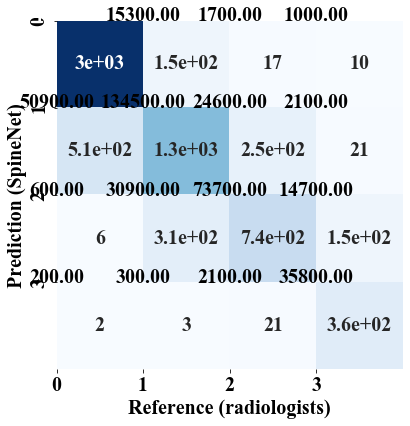

In [3]:
plot_cm(cm, fs=20, filename=None, xlab='Reference (radiologists)', ylab='Prediction (SpineNet)', title=None)

# df_long_mc.to_csv("../data/mc_long.csv")
# df_long_dd.to_csv("../data/dd_long.csv")

# x = [2,3,4,5]
# y = [2,3,4,5]
# # figsize = 4, 4
# # ax1 = sns.heatmap(cm, annot=True, xticklabels=x, yticklabels=y, cmap='Blues', cbar=False)
# # ax1.set(title="Pfirrmann grades",
# #       xlabel="Reference",
# #       ylabel="SpineNet")
# # plt.show()

/tmp/ipykernel_338235/1505243447.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


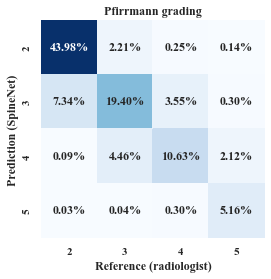

In [12]:
import matplotlib.pyplot as plt
figsize = 4, 4
ax, axes = plt.subplots(1, 1, figsize = figsize)
sns.set(font="Times New Roman")
# ax1 = sns.heatmap(cm/np.sum(cm), annot=True,
#             fmt='.2%', xticklabels=x, yticklabels=y, cmap='Greens', cbar = False)
#
# ax1.set(title="Pfirrmann grades",
#       xlabel="Reference (radiologist)",
#       ylabel="Target (SpineNet)")
#
#
# D
#
# fig = ax1.get_figure()
# fig = ax2.get_figure()

# fig.suptitle("Contingency tables")
# fig.savefig("../output/comfusion_matrix_dd.svg")
# fig.show()


ax1 = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues', cbar=False)

# sns.set(font="Times New Roman")
ax1.set(title="Pfirrmann grading",
      xlabel="Reference (radiologist)",
      ylabel="Prediction (SpineNet)",
      xticklabels = [2,3,4,5],
      yticklabels = [2,3,4,5])


# ax2 = sns.heatmap(cm/sum(cm), annot=True,
#             fmt='.2%', cmap='Blues', cbar = False, ax = axes[1])



fig = ax1.get_figure()
# fig = ax2.get_figure()

# fig.suptitle("Contingency tables")
# fig.savefig("../output/comfusion_matrix_dd.svg")
fig.show()
